<div class="alert alert-block alert-success">
<b>1) Mengimpor Data dari Tempat Semula </b> 
</div>

In [10]:
# Mengimpor perpustakaan visualisasi

import pandas as pd
import numpy as np
from pandas.plotting  import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
    

<div class="alert alert-block alert-success">
<b>2) Mengimpor data </b> 
</div>

In [11]:
# Mengimpor data
my_filepath ='../input/smart-home-dataset-with-weather-information/HomeC.csv'
#lecture duy fichier par variable 
my_data = pd.read_csv(my_filepath  ,   parse_dates=True)
home_dat = my_data.select_dtypes(exclude=['object'])
# Pengindeksan waktu
time_index = pd.date_range('2016-01-01 05:00', periods=503911,  freq='min')  
time_index = pd.DatetimeIndex(time_index)
home_dat = home_dat.set_index(time_index)

<div class="alert alert-block alert-warning">
<b></b> 
File CSV ini berisi pembacaan dengan interval waktu satu menit peralatan rumah tangga dalam kW dari sensor pintar dan kondisi cuaca di wilayah ini.</div>


### The weather and energy dataset
Dataset ini berisi pembacaan dengan rentang waktu 1 menit dari peralatan rumah tangga dalam kW dari pengukur pintar dan kondisi cuaca di wilayah tersebut.

#### Data Columns Descriptions:
(Sumber Data yang Digunakan : https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information)
##### Index 
- **time**
    * Waktu pembacaan, dengan rentang waktu 1 menit.

##### Energy Usage 
- **Penggunaan Energi [kW]**
    * Konsumsi energi total
- **Gen [kW]**
    * Total energi yang dihasilkan dengan menggunakan tenaga surya atau sumber daya pembangkit listrik lainnya
- **Keseluruhan rumah [kW]**
    * Konsumsi energi rumah secara keseluruhan
- **Mesin pencuci piring [kW]**
    * energi yang dikonsumsi oleh alat tertentu
- **Tungku 1 [kW]** 
    * konsumsi energi tungku
    * energi yang dikonsumsi oleh alat tertentu
- **Tungku 2 [kW]** 
    * konsumsi energi yang dikonsumsi oleh alat tertentu
    * energi yang dikonsumsi oleh alat tertentu
- **Kantor rumah [kW]**
    * energi yang dikonsumsi oleh alat tertentu
- **Lemari es [kW]**
    * energi yang dikonsumsi oleh alat tertentu
- **Gudang anggur [kW]**
    * energi yang dikonsumsi oleh alat tertentu
- **Pintu garasi [kW]**
    * energi yang dikonsumsi oleh alat tertentu
- **Dapur 12 [kW]**
    * konsumsi energi di dapur 1
- **Dapur 14 [kW]** 
    * konsumsi energi di dapur 2
- **Dapur 38 [kW]**
    * konsumsi energi di dapur 3
- **Lumbung [kW]**
    * energi yang dikonsumsi oleh alat tertentu
- **Sumur [kW]**
    * energi yang dikonsumsi oleh alat tertentu
- **Microwave [kW]**
    * energi yang dikonsumsi oleh alat tertentu
- **Ruang Tamu [kW]**
    * konsumsi energi di Ruang Tamu
- **Solar [kW]**
    * Pembangkit listrik tenaga surya

In [37]:
my_data = my_data[:-1]
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 32 columns):
time                   503910 non-null object
use [kW]               503910 non-null float64
gen [kW]               503910 non-null float64
House overall [kW]     503910 non-null float64
Dishwasher [kW]        503910 non-null float64
Furnace 1 [kW]         503910 non-null float64
Furnace 2 [kW]         503910 non-null float64
Home office [kW]       503910 non-null float64
Fridge [kW]            503910 non-null float64
Wine cellar [kW]       503910 non-null float64
Garage door [kW]       503910 non-null float64
Kitchen 12 [kW]        503910 non-null float64
Kitchen 14 [kW]        503910 non-null float64
Kitchen 38 [kW]        503910 non-null float64
Barn [kW]              503910 non-null float64
Well [kW]              503910 non-null float64
Microwave [kW]         503910 non-null float64
Living room [kW]       503910 non-null float64
Solar [kW]             503910 non-null float

In [41]:
my_data = my_data.drop(['icon', ], axis=1)
print (my_data)

              time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0       1451624400  0.932833  0.003483            0.932833         0.000033   
1       1451624401  0.934333  0.003467            0.934333         0.000000   
2       1451624402  0.931817  0.003467            0.931817         0.000017   
3       1451624403  1.022050  0.003483            1.022050         0.000017   
4       1451624404  1.139400  0.003467            1.139400         0.000133   
...            ...       ...       ...                 ...              ...   
503905  1452128305  1.601233  0.003183            1.601233         0.000050   
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office

<div class="alert alert-block alert-success">
<b>3) Data Understanding</b> 
</div>


In [12]:
energy_data = home_dat.filter(items=[ 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
                                     'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
                                     'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
                                     'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
                                     'Microwave [kW]', 'Living room [kW]', 'Solar [kW]'])

weather_data = home_dat.filter(items=['temperature',
                                      'humidity', 'visibility', 'apparentTemperature', 'pressure',
                                      'windSpeed', 'windBearing', 'dewPoint'])

In [13]:
# Gabungkan fitur dari kedua kumpulan data
all_features = energy_data + weather_data

In [45]:
# Dengan asumsi 'home_dat' adalah DataFrame yang berisi data
X = home_dat.filter(all_features)
y = home_dat[my_data]

ValueError: Must pass DataFrame with boolean values only

In [17]:
# Membuat Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [18]:
# Melihat rekaman data pertama
energy_data.head()

,gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
2016-01-01 05:00:00,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483
2016-01-01 05:01:00,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467
2016-01-01 05:02:00,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467
2016-01-01 05:03:00,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483
2016-01-01 05:04:00,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467


In [19]:
# Data cuaca
weather_data.head()

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,dewPoint
2016-01-01 05:00:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2016-01-01 05:01:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2016-01-01 05:02:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2016-01-01 05:03:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2016-01-01 05:04:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4


In [20]:
# konsumsi energi per hari
energy_per_day = energy_data.resample('D').sum()
energy_per_day.head()

,gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
2016-01-01,18.026200,1366.269517,59.517171,231.823183,260.196833,64.668783,94.740300,29.093367,15.228367,0.670050,10.935817,0.013966,99.622950,30.537233,12.961117,77.071667,18.026200
2016-01-02,76.051300,1851.521067,63.154404,324.670567,359.091400,145.570317,74.851733,24.096767,19.246333,0.945467,14.503251,0.015537,185.776967,33.688133,12.480300,71.142950,76.051300
2016-01-03,74.081433,1651.128133,105.508668,274.695483,338.935050,196.064167,92.149033,32.989533,19.444933,1.045883,18.030351,0.015770,146.493667,31.955233,19.066117,42.779250,74.081433
2016-01-04,108.525017,1500.686017,58.880760,286.721883,318.407883,180.650867,71.016683,20.980700,19.249983,1.120900,16.210219,0.015136,47.837017,43.438883,20.249933,93.077467,108.525017
2016-01-05,148.107500,1597.968867,72.973254,429.067400,387.997850,133.360867,80.135633,30.792300,19.773067,0.873417,13.866869,0.014204,50.166067,19.157417,16.658967,44.483650,148.107500


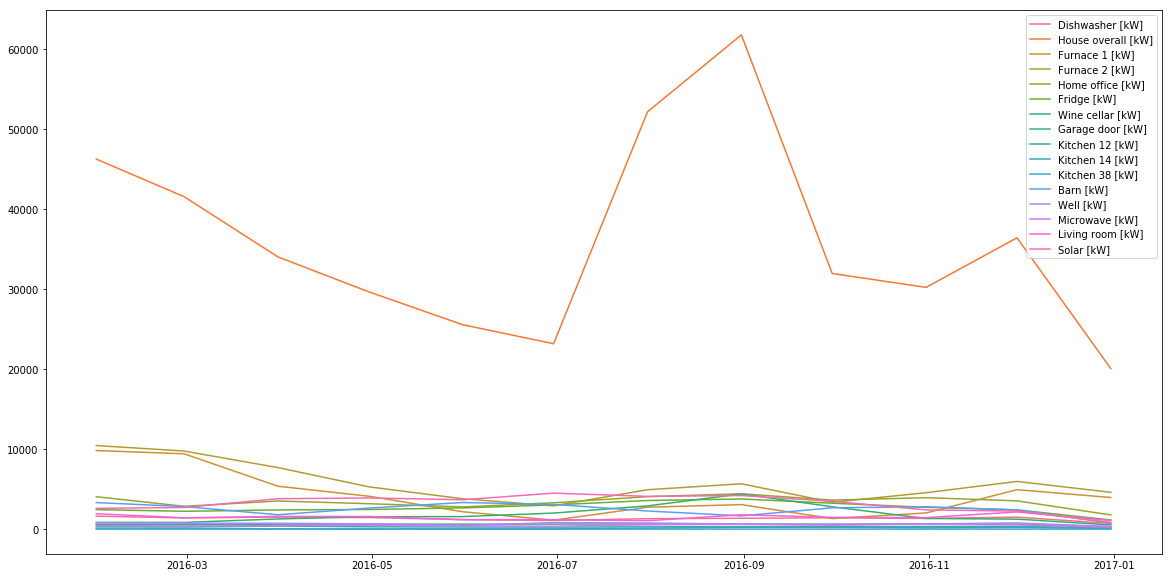

In [21]:
# Energi yang dikonsumsi selama sebulan
energy_per_month = energy_data.resample('M').sum() 
plt.figure(figsize=(20,10))
sns.lineplot(data= energy_per_month.filter(items=[ 'Dishwasher [kW]','House overall [kW]',
                                     'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
                                     'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
                                     'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
                                     'Microwave [kW]', 'Living room [kW]', 'Solar [kW]']) , dashes=False  )


In [23]:
# Membuat Sample data
data = pd.DataFrame({
    "my_data": [10, 20, 30, 40, 50],
    "time_index": ["A", "B", "A", "B", "A"],
    "home_datt": ["Yes", "No", "Yes", "No", "Yes"]
})


In [27]:
# Pisahkan data menjadi set pelatihan dan pengujian
X = data.drop("home_datt", axis=1)  # Features (independent variables)
y = data["home_datt"]  # Target variable (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

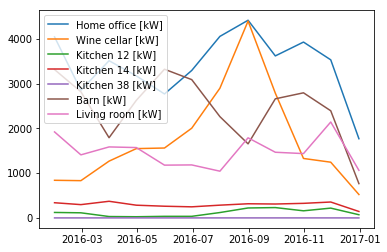

In [31]:
# Visualisasi konsumsi per ruangan
sns.lineplot(data= energy_per_month.filter(items=[      
                                     'Home office [kW]',
                                     'Wine cellar [kW]', 'Kitchen 12 [kW]',
                                     'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]',
                                      'Living room [kW]']) , dashes=False  )

In [32]:
# Cuaca dicatat per hari/bulan
weather_per_day = weather_data.resample('D').mean()  
weather_per_day.head()
weather_per_month = weather_data.resample('M').mean()               

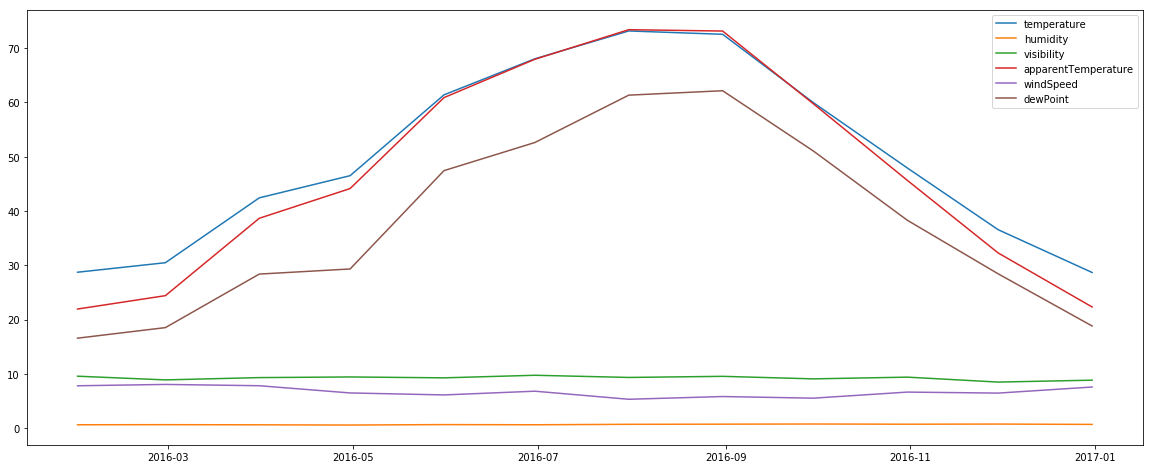

In [33]:
# Visualisasi cuaca
plt.figure(figsize=(20,8))
sns.lineplot(data= weather_per_month.filter(items=['temperature',
                                      'humidity', 'visibility', 'apparentTemperature',
                                      'windSpeed', 'dewPoint']) ,dashes=False )

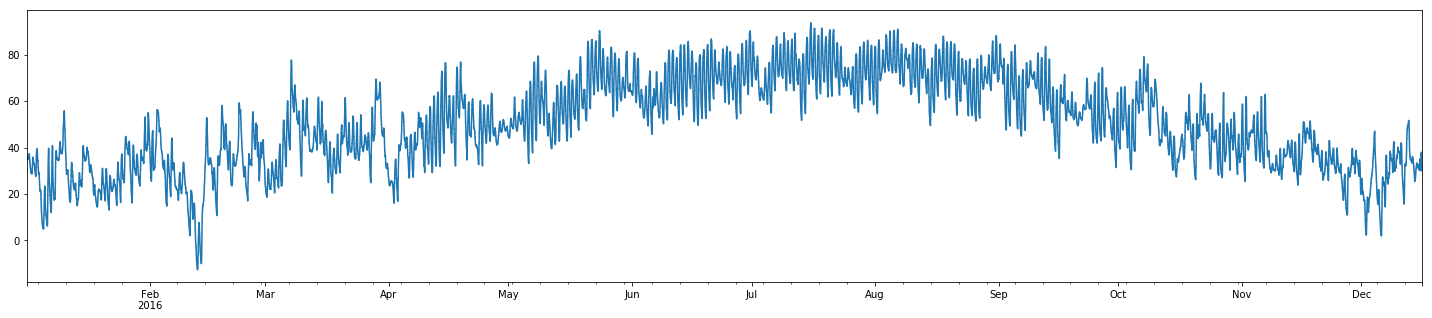

In [34]:
# Distribusi suhu
weather_data['temperature'].plot(figsize=(25,5))


<div class="alert alert-block alert-info">
<b>Aktivitas di rumah selama sehari</b> 
</div>

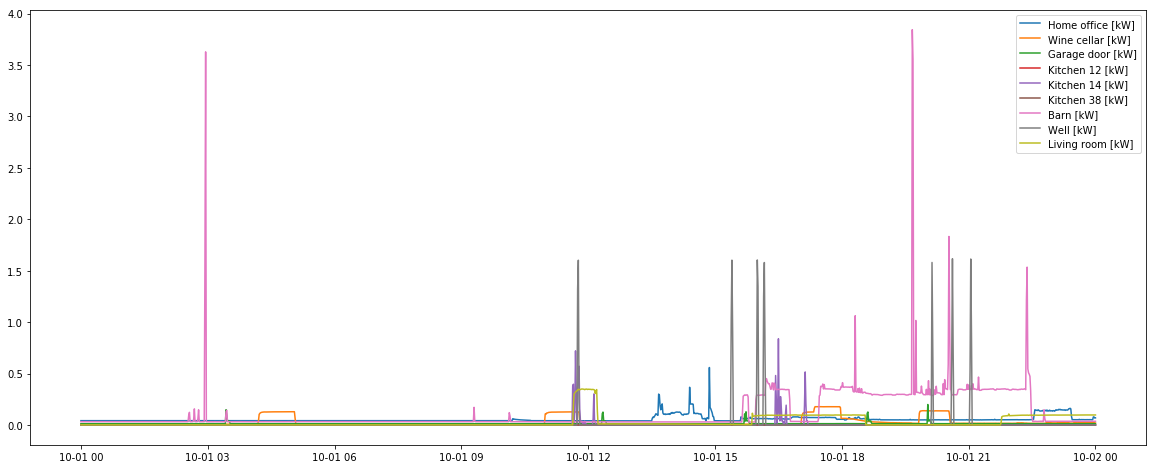

In [35]:
# Visualisasi konsumsi tanggal 10-01-2016
plt.figure(figsize=(20,8))
sns.lineplot(data= energy_data.loc['2016-10-01 00:00' : '2016-10-02 00:00'].filter([ 'Home office [kW]',
                                     'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
                                     'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
                                 'Living room [kW]']),dashes=False , )

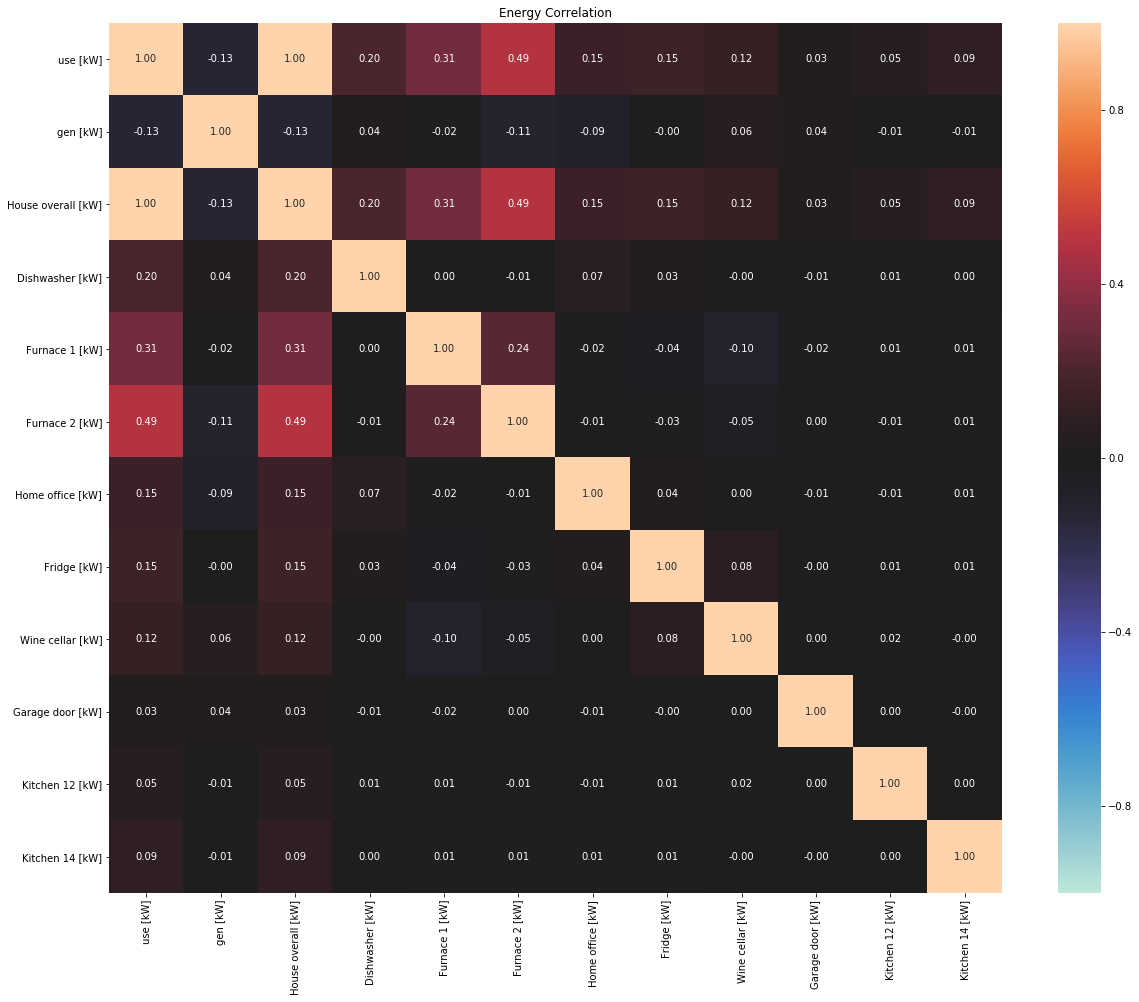

In [48]:
numeric_data = data.select_dtypes(include=[np.number]) 
correlation_matrix = numeric_data.corr() 
fig = plt.subplots(figsize=(20, 16))
sns.heatmap(my_data[my_data.columns[0:13].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)  
plt.title('Energy Correlation', fontsize=12)  
plt.show()

<div class="alert alert-block alert-info">
<b>gudang mengkonsumsi lebih banyak energi dari ruangan lain.</b> 
</div>


<div class="alert alert-block alert-success">
<b>Simulasi ini mewakili pekerjaan awal yang terdiri dari visualisasi dan pemahaman data dari smart home.</b> 
</div>